# EE 521 DSP Lab
## Assignment-4 | AVI KHANDELWAL, 204102301

## Importing packages -

In [2]:
from numpy import sin,cos,pi,sqrt
import numpy as np
import matplotlib.pyplot as plt
import math as m
import warnings
import cmath
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


warnings.filterwarnings('ignore')

## Part A: Discrete Fourier Transform



### Q1. Write functions to implement the DFT and IDFT equations.

In [23]:
x = np.array([1,2,3,4,5])

def DFT(x):
  N = len(x)
  X = np.zeros(N,dtype=np.complex_)
  for k in range(N):
    for n in range(N):
      X[k] += x[n]*np.exp(-1j*(2*pi/N)*n*k)
  return X

def IDFT(X):
  N = len(X)
  x = np.zeros(N,dtype=np.complex_)
  for n in range(N):
    for k in range(N):
      x[n] += 1/N*(X[k]*np.exp(1j*(2*pi/N)*n*k))
    x[n] = round(x[n],5)
  return x

print("Discrete time sequence:",x,"\n")
X = DFT(x)
print("DFT of the discrete time sequence:",X,"\n")
y = IDFT(X)
print("IDFT of the discrete time sequence:",y,"\n")

Discrete time sequence: [1 2 3 4 5] 

DFT of the discrete time sequence: [15. +0.j         -2.5+3.4409548j  -2.5+0.81229924j -2.5-0.81229924j
 -2.5-3.4409548j ] 

IDFT of the discrete time sequence: [1.-0.j 2.-0.j 3.+0.j 4.+0.j 5.+0.j] 



### Q2. Write a function to compute the circular convolution of two sequences. Find the circular convolution of x = [1, 2, 3, 0, 0, 0, 0] and h = [1, 1, 1, 1, 1, 1, 1] using the function.

In [25]:
def cir_conv(x,h):
  X = DFT(x)
  H = DFT(h)
  Y = X*H
  return IDFT(Y)

x = [1, 2, 3, 0, 0, 0, 0]
h = [1, 1, 1, 1, 1, 1, 1] 
print(abs(cir_conv(x,h)))

[6. 6. 6. 6. 6. 6. 6.]


### Q3. A signal is given as x(t) = cos2πf t where f = 30 Hz. The signal is sampled at 100 times per second for 0.91 seconds and then its DFT is computed. Plot the spectrum versus frequency in Hz. What is the magnitude of DFT at 35 Hz? Is this value non-zero? If so then why?
 


 DFT magnitude corresponding to 35 Hz is: 4.097539212483234 



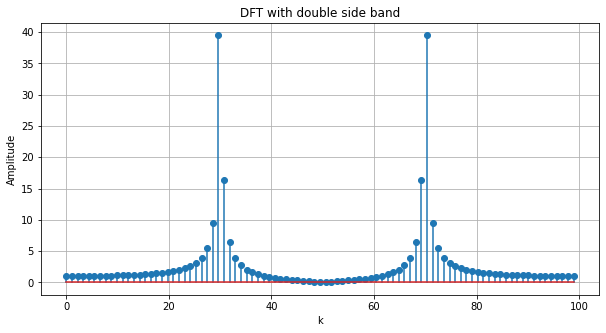

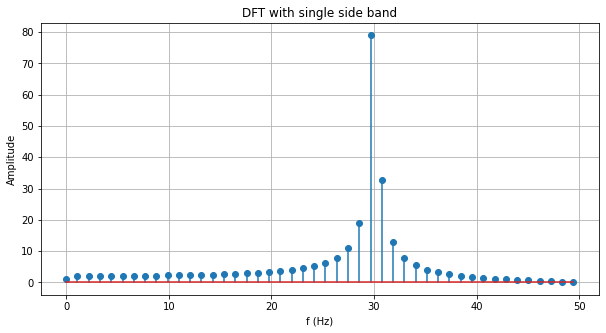

In [40]:
Fs = 100
T = 1/Fs
N = 91     
n = np.arange(0,N*T,T)
F = np.arange(0,Fs,Fs/N)
f = 30 
x  = cos(2*pi*f*n)
X = DFT(x)
plt.figure(figsize=(10,5))
plt.grid()
plt.stem(F,abs(X))
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.title('DFT with double side band')

SSB = X[:46]
SSB[1:] = 2*SSB[1:]
F = np.arange(0,Fs/2,Fs/N)
plt.figure(figsize=(10,5))
plt.grid()
plt.stem(F,abs(SSB))
plt.xlabel('f (Hz)')
plt.ylabel('Amplitude')
plt.title('DFT with single side band')

# To find out the DFT magnitude at 35 Hz, we need to find the SSB magnitude corresponding to 32nd index in array (calculated using kFs/N = 35, which approx gives 32)

print("\n","DFT magnitude corresponding to 35 Hz is:", abs(SSB[32]),"\n")

# Ideally when computing DFT, we get magnitude only corresponding to the frequencies present in the signal, while other magnitudes are zero but in this case the fraction
# Fs/N is not an integer hence when incrementing we don't get a whole number frquency point because of which there is some DFT magnitude in the vicinity of 30 Hz, so that is
# why we can see a peak at 30 Hz and DFT magnitude falling drastically on either side of it while in ideal case there should be no other components present in the neibourhood
# of 30Hz frequency.

### Q3.Consider the two sequences y = [1, −3, 1, 5] and x = [7, −7, −9, −3]. Does there exist a sequence h such that y is the circular convolution of x and h. Find h using DFT and IDFT

In [47]:
y = np.array([1,-3,1,5])
x = np.array([7,-7,-9,-3])
X = DFT(x)
Y = DFT(y)
H = Y/X
h = np.round(abs(IDFT(H)),2)
print("h = ",list(h))

h =  [0.02, 0.32, 0.14, 0.15]


### Q4. Compute the energy of the signal x[n] = (3/4)nu[n] for 0 ≤ n ≤ 50. If the DFT of this signal is X(k) then what is the energy of X(k) and how does it relate to that of x[n].


In [33]:
N = 51
n = np.arange(N)

x = (3/4)**n
X = DFT(x)
E1 = sum(x**2)
E1 = round(E1,4)
print("Energy through time domain approach:",E1)

# According to parsevals relation, the energy in time domain can be calculated in frequency domain via DFT expression as follows-

E2 = sum(abs(X)**2)/N
E2 = round(E2,4)
print("Energy through frequency domain (DFT) approach:",E2)

Energy through time domain approach: 2.2857
Energy through frequency domain (DFT) approach: 2.2857


### Q5. Is it possible to compute the DTFS coefficients of the square wave mentioned in Assignment-3 using the function written for DFT as mentioned above. If yes, then modify the function to compute the DTFS coefficients of the signal and show a labelled plot of the spectrum of these coefficients.

<StemContainer object of 3 artists>

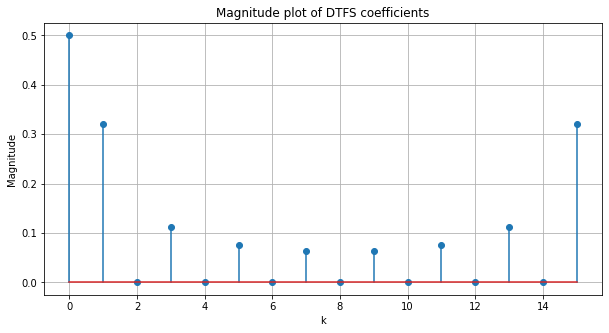

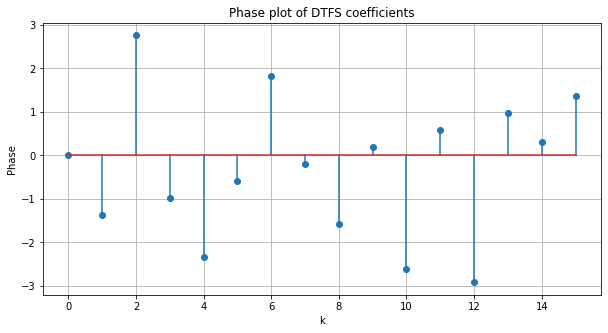

In [4]:
def DTFS_from_DFT(x):
  N = len(x)
  a = np.zeros(N,dtype=np.complex_)
  for k in range(N):
    for n in range(N):
      a[k] += (x[n]*np.exp(-1j*(2*pi/N)*n*k))/N
  return a
x = np.array([1]*8+[0]*8)

plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel("k")
plt.ylabel("Magnitude")
plt.title("Magnitude plot of DTFS coefficients")
a = DTFS_from_DFT(x)
plt.stem(abs(a))

plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel("k")
plt.ylabel("Phase")
plt.title("Phase plot of DTFS coefficients")
plt.stem(np.angle(a))

## Part B: Discrete Cosine Transform


### Q1. Consider a signal x[n] = [8, 16, 24, 32, 40, 48, 56, 64] of length N = 8. Compute the DCT of this signal.



In [18]:
def DCT(x):
  N = len(x)
  X = np.zeros(N)
  for n in range(N):
      X[0] += (sqrt(2)/sqrt(N))*x[n]*(1/sqrt(2))
  for m in range(1,N):
    for n in range(N):
      X[m] += (sqrt(2)/sqrt(N))*x[n]*cos(((pi*m)/(2*N))*(2*n + 1))
  return np.round(X,3)

def IDCT(X):
  N = len(X)
  x = np.zeros(N)
  for n in range(N):
    for m in range(N):
      if m==0:
        cm = 1/sqrt(2)
      else:
        cm = 1
      x[n] += (sqrt(2)/sqrt(N))*X[m]*cm*cos(((pi*m)/(2*N))*(2*n + 1))
  return np.round(x,3)

n = np.arange(8)
x = np.array([8, 16, 24, 32, 40, 48, 56, 64]) 
X = DCT(x)
print("The DCT of the above signal is:",X,"\n")

The DCT of the above signal is: [101.823 -51.539  -0.     -5.388   0.     -1.607  -0.     -0.406] 



### Q2. Now keep only the first four DCT coefficients while discarding the rest and then compare its energy with that of x[n].

In [19]:
a = np.concatenate([X[:4],np.zeros(4)])

E1 = sum(x**2)
E1 = round(E1,4)
print("Energy before applying DCT:",E1,"\n")

E2 = sum(a**2)
E2 = round(E2,4)
print("Energy after applying DCT:",E2,"\n")


Energy before applying DCT: 13056 

Energy after applying DCT: 13053.2224 



### Q3. Compute the inverse DCT of the sequence obtained and plot it alongside x[n]. Also compute the mean square error between the two signals.

The inverse DCT of the above signal is: [ 8.486 15.099 24.325 32.469 39.531 47.674 56.901 63.514] 

Mean square error between the two signals: 34.35 




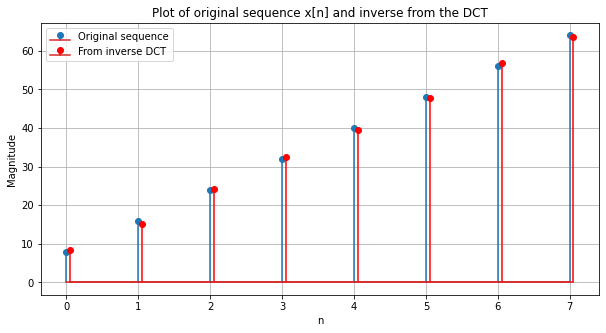

In [20]:
y = IDCT(a)
print("The inverse DCT of the above signal is:",y,"\n")

mse = np.mean(np.square(x-y))*100
print("Mean square error between the two signals:",round(mse,2),"\n\n")

plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel("n")
plt.ylabel("Magnitude")
plt.title("Plot of original sequence x[n] and inverse from the DCT")
plt.stem(n,x)
plt.stem(n+0.05,y,'r',markerfmt="ro")
plt.legend(["Original sequence","From inverse DCT"])

### Q4. Now repeat the same process with DFT and compare the mean square errors. Comment on your observations.

The DFT of the above signal is: [288.          83.62002975  45.254834    34.63655041  32.
  34.63655041  45.254834    83.62002975] 


Energy before applying DFT: 13056 

Energy after applying DFT: 11648.0 

The inverse DFT of the above signal is: [28.46945229 24.33105012 32.24903099 32.82514819 40.66313261 40.19950248
 48.16637832 50.38362545] 

Mean square error between the two signals: 10814.89 




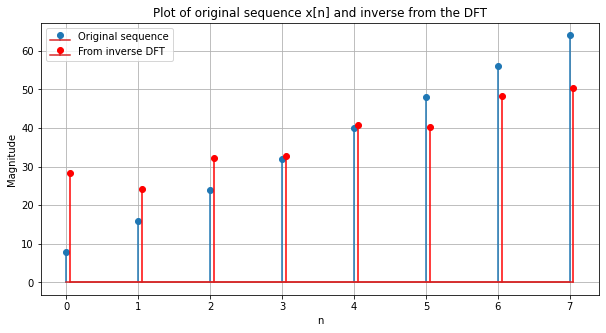

In [16]:
n = np.arange(8)
x = np.array([8, 16, 24, 32, 40, 48, 56, 64]) 
X = DFT(x)
print("The DFT of the above signal is:",np.abs(X),"\n\n")

a = np.concatenate([X[:4],np.zeros(4)])

E1 = sum(x**2)
print("Energy before applying DFT:",E1,"\n")

E2 = sum(abs(a)**2)/8
print("Energy after applying DFT:",E2,"\n")

y = np.abs(IDFT(a))
print("The inverse DFT of the above signal is:",y,"\n")

mse = np.mean(np.square(abs(x-y)))*100
print("Mean square error between the two signals:",round(mse,2),"\n\n")

plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel("n")
plt.ylabel("Magnitude")
plt.title("Plot of original sequence x[n] and inverse from the DFT")
plt.stem(n,x)
plt.stem(n+0.05,abs(y),'r',markerfmt="ro")
plt.legend(["Original sequence","From inverse DFT"])

